Временной ряд есть упорядоченная во времени последовательность иземерний некоторого показателя. Промежутки измерения могут быть неравномерными. Отдельное наблюдение(точка на графике - как раз те самые 4 точки, которые нам и будут необходимы) это своя генеральная совокупность. Не все точки т.е. принадлежат одной совокупности, а каждая точка есть отдельная генеральная совокупность. Все значения есть не случайная величина, но последовтаельность случайных величин. Будем описывать временной ряд формулой суммы функции от времени (f(t)) и ошибкой eps_t. Ошибка, очев, не может быть предсказана/удалена моделькой. \begin{equation}y = f(t) + eps_t\end{equation}.

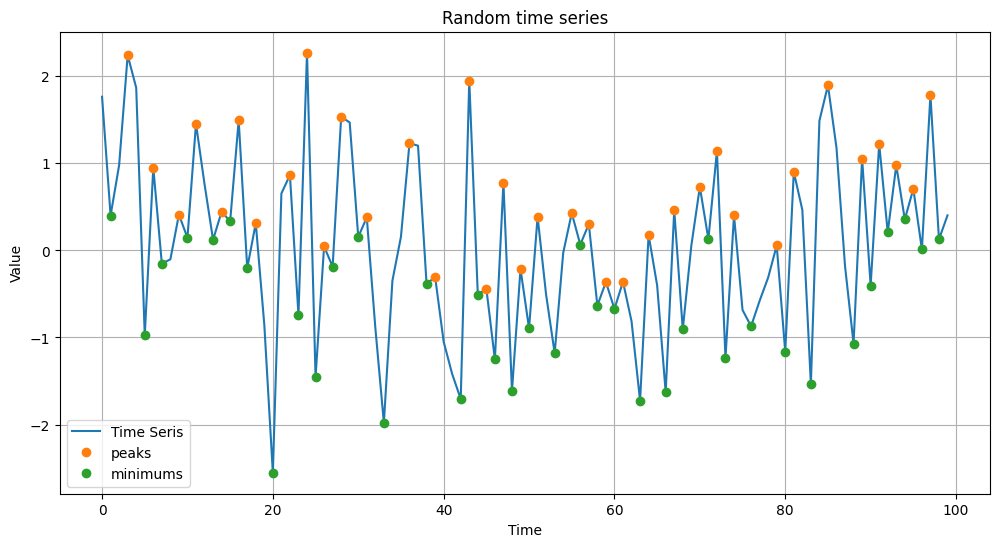

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks

#set a startt value for random numbers generating
np.random.seed(0)
#set a randonm time series
time_series = np.random.randn(100)
#find a peaks in this series
peaks, _ = find_peaks(time_series)
#find a local min's
minimums, _ = find_peaks(-time_series)

#risunok

plt.figure(figsize = (12, 6))
plt.plot(time_series, label = 'Time Seris')
plt.plot(peaks, time_series[peaks], "o", label = "peaks")
plt.plot(minimums, time_series[minimums], "o", label = "minimums")
plt.xlabel('Time')
plt.ylabel('Value')
plt.grid(True)
plt.title('Random time series')
plt.legend()
plt.show()

Цели анализа временных рядов: 1)Решение задачи описательной аналитики 2)Выявить причины, которые привели нас к нашей последовательности значений (в будущем - повлиять на эти самые значения) 3)Предсказывать будущие значения. В реальных условиях мы имеем "тренд" - одну из главных составляющих ф-ии временного ряда. Вокруг тренда f(t) уже всё и колеблется: \begin{equation}y = f(t) + g(t) + h(t) + eps_t.\end{equation} Тренд не обязательно прямая. Составляющая g(t) есть циклическая составляющая - сезонность(см.картинку ниже(синусоидальная компонента, представляющая циклические колебания).). А h(t) есть цикличность - годовая, квартальная, сезонная и проч.. Но всё это нам как будто не надо, т.к. ФПГ не имеет сезонности в коротком промежутке, так что имеем только важную f(t).


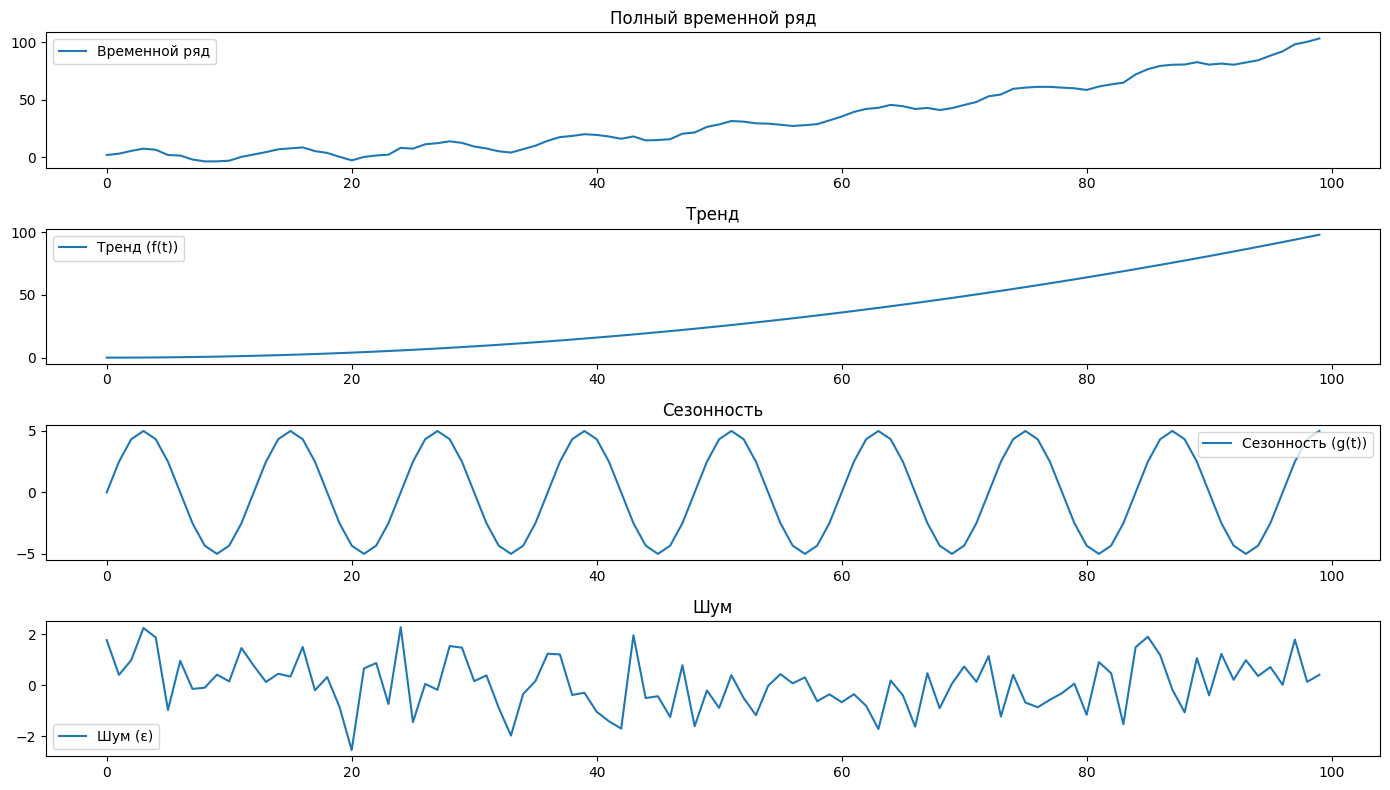

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(0)

p = 100

t = np.arange(p)

trend = 0.01 * t**2

seasonality = 5 * np.sin(2 * np.pi * t / 12)

noise = np.random.normal(0, 1, p)

time_series = trend + seasonality + noise

plt.figure(figsize = (14, 8))

plt.subplot(4, 1, 1)
plt.plot(time_series, label='Временной ряд')
plt.title('Полный временной ряд')
plt.legend()

plt.subplot(4, 1, 2)
plt.plot(trend, label='Тренд (f(t))')
plt.title('Тренд')
plt.legend()

plt.subplot(4, 1, 3)
plt.plot(seasonality, label='Сезонность (g(t))')
plt.title('Сезонность')
plt.legend()

plt.subplot(4, 1, 4)
plt.plot(noise, label='Шум (ε)')
plt.title('Шум')
plt.legend()

plt.tight_layout()
plt.show()

Полиномиальные тренды: Если общий вид анализа выглядит как нахождение одной линии, которая описывает тенденцию, то полиномиальный метод строит полином \begin{equation}y = a_n*x^n + a_(n-1)*x^(n-1) + ... + a_k\end{equation}. Гигапохуй на это, не наша задача ещё прогнозировать что-то. Продвинутый полиномиальный метод - метод скользящих средних, если есть желание, то можно почитать(по сути просто апроскимируем новое значение на основе усреднения значений из предыдущего отрезка времени. Мы берём какой-то отрезок и на его правой границе вычисляем тренд, и так итерируемся по ряду. Хз, какая-то шляпа для криптоинвесторов.)

Метод экспоненциального сглаживания: 1)Начальное значение сглаженного временного ряда обычно устанавливается равным первому наблюдению. 2)Каждое последующее сглаженное значение вычисляется как взвешенное среднее между предыдущим сглаженным значением и фактическим наблюдением. Формула для простого экспоненциального сглаживания: \begin{equation}S_t = alpha * y_t + (1 - alpha) * S_(t-1)\end{equation} где \begin{equation}S_t\end{equation} - сглаженное значение в момент времени
t, \begin{equation}y_t\end{equation} - фактическое наблюдение в момент времени
t, и \begin{equation}alpha\end{equation} - коэффициент сглаживания от 0 до 1. 3)Сглаженное значение на последнем шаге используется в качестве прогноза для следующего периода.


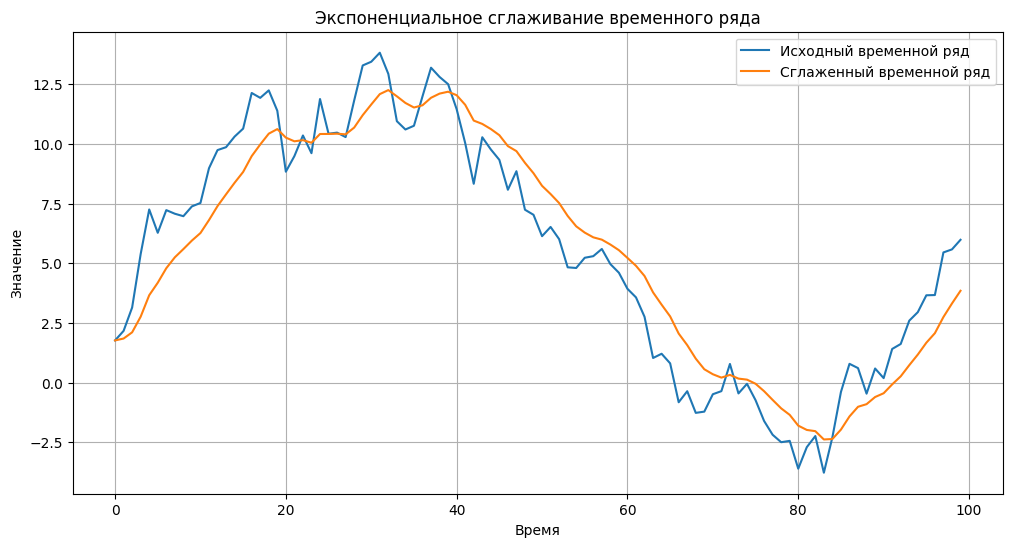

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(0)

time_series = np.random.randn(100).cumsum()

alpha = 0.2

S = [time_series[0]]

for t in range(1, len(time_series)):
    S_t = alpha * time_series[t] + (1 - alpha) * S[-1]
    S.append(S_t) #нихуя хитрого короче нет, но для упрощения прогнозирования(типо без шумов)
                  #можно сглаживать - так проще будет избавиться от зависимости точек, которые расположены далеко от прогнозируемой точки
plt.figure(figsize=(12, 6))
plt.plot(time_series, label='Исходный временной ряд')
plt.plot(S, label='Сглаженный временной ряд')
plt.title('Экспоненциальное сглаживание временного ряда')
plt.xlabel('Время')
plt.ylabel('Значение')
plt.legend()
plt.grid(True)
plt.show()

Шумы: бывают разные, в целом понятно, что есть по сути своей

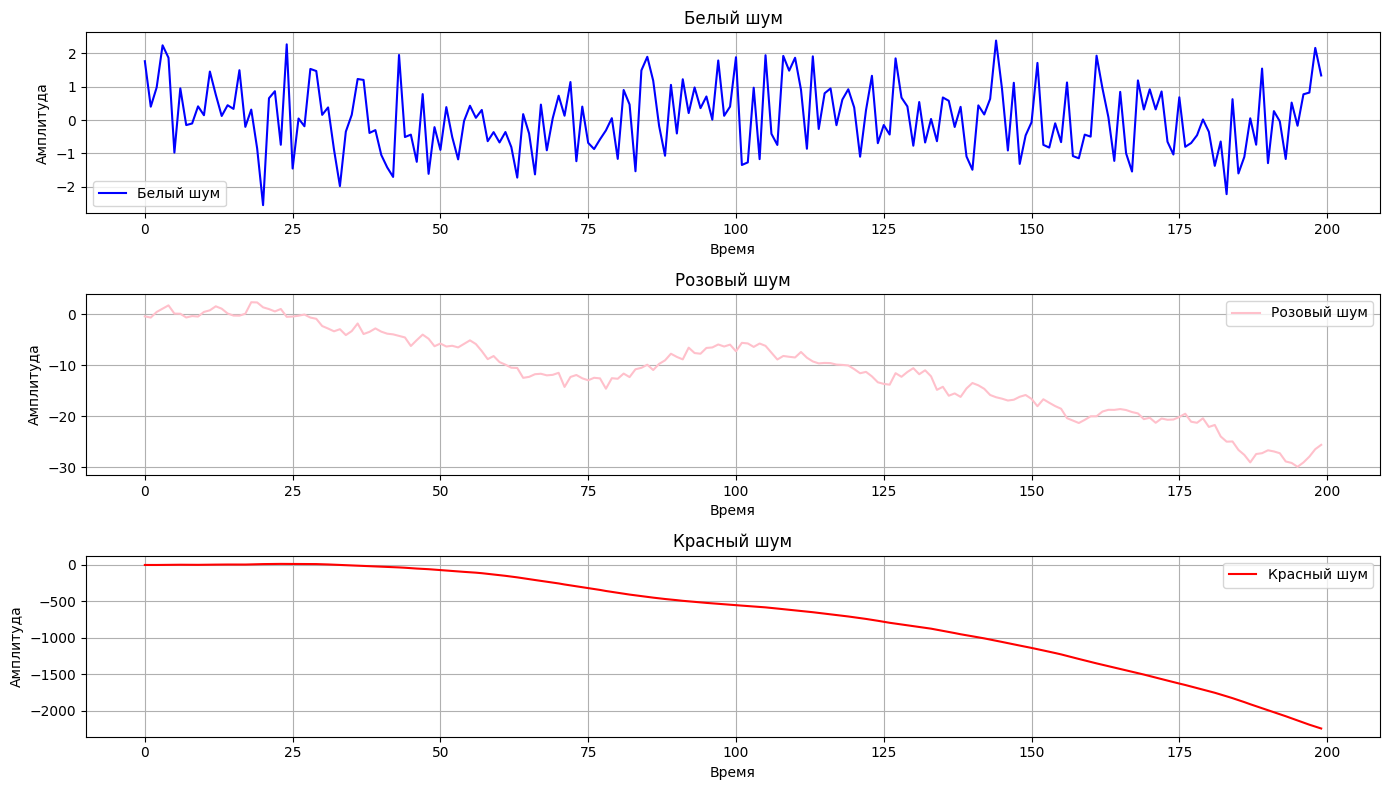

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(0)

n = 200

t = np.arange(n)

white_noise = np.random.normal(0, 1, n)
pink_noise = np.cumsum(np.random.normal(0, 1, n))
red_noise = np.cumsum(pink_noise) #самый ненатуральный шум, в природе редко

#все виды шумов обратимы, т.е. можно развернуть графики в обратную сторону
#также существуют комбинации цветов шумов, но пока хз, как это применимо, надо
#датасеты смотреть

noise_types = [
    (white_noise, 'Белый шум', 'blue'),
    (pink_noise, 'Розовый шум', 'pink'),
    (red_noise, 'Красный шум', 'red')
]

plt.figure(figsize=(14, 8))
for i, (noise, label, color) in enumerate(noise_types, 1):
    plt.subplot(3, 1, i)
    plt.plot(t, noise, label=label, color=color)
    plt.title(label)
    plt.xlabel('Время')
    plt.ylabel('Амплитуда')
    plt.legend()
    plt.grid(True)

plt.tight_layout()
plt.show()

Авторегрессия:
Определение: Автокоррелция - коррелция значений ряда. Характеризует интервал, в котором **может** лежать последующее значение временного ряда(следующее значение всегда ожидается рядом с предыдущим).
Авторегрессия - это модель, которая использует автокорреляцию для предсказания будущих значений временного ряда.
Формула авторегрессии:
\begin{equation}AR_N = alpha + a_1*X_(N-1) + a_2 * X_(N-2)\end{equation}

Порядок модели (p): Количество предыдущих значений, используемых для предсказания текущего значения. Выбор оптимального порядка важен для точности модели.
Стационарность: Авторегрессионные модели требуют, чтобы временной ряд был стационарным, то есть его статистические свойства (среднее, дисперсия) не изменяются со временем.

Нам всё это вроде не надо - в проекте предсказанием следующих значений флэксить не требуется.



Стационарный ряд: Среднее, дисперсия и автокорреляция остаются постоянными на протяжении всего временного ряда.
Нестационарный ряд: Характеристики ряда изменяются со временем. Это может быть вызвано трендами, сезонностью или структурными изменениями.

Как с ФПГ вообще связано:
Спокойное состояние: В случае спокойносидящего человека, ФПГ может быть стационарной, так как сердечный ритм и кровообращение стабильны.
Активное состояние: При физической активности или стрессе характеристики ФПГ могут изменяться, делая ряд нестационарным(нам по идее всё равно - соберем датасет людей в спокойствии)

Но если придется фиксить, то имеются способы:
1)Полиномы и сплайны

2)Фильтрация Калмана

3)Скользящее среднее

4)Трансформация Бокса-Кокса

5)Десезонлизация

6)Логарифмирование

7)Дифференцирование

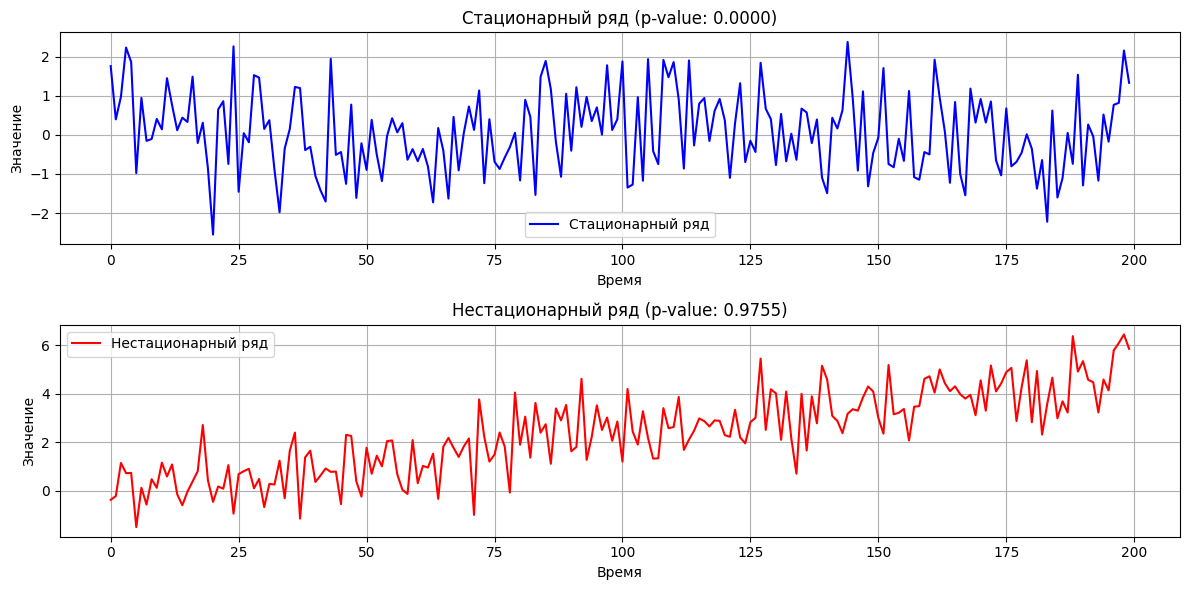

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller #абракадабра, не обращаем внимание

np.random.seed(0)

stationary_series = np.random.normal(0, 1, 200)

trend = np.linspace(0, 5, 200)
non_stationary_series = trend + np.random.normal(0, 1, 200)

def adf_test(series):
    result = adfuller(series)
    p_value = result[1]
    return p_value

stationary_p_value = adf_test(stationary_series)
non_stationary_p_value = adf_test(non_stationary_series)

plt.figure(figsize=(12, 6))

plt.subplot(2, 1, 1)
plt.plot(stationary_series, label='Стационарный ряд', color='blue')
plt.title(f'Стационарный ряд (p-value: {stationary_p_value:.4f})')
plt.xlabel('Время')
plt.ylabel('Значение')
plt.legend()
plt.grid(True)

plt.subplot(2, 1, 2)
plt.plot(non_stationary_series, label='Нестационарный ряд', color='red')
plt.title(f'Нестационарный ряд (p-value: {non_stationary_p_value:.4f})')
plt.xlabel('Время')
plt.ylabel('Значение')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

Универсальный анализ временных рядов:

Временные признаки: Включают дату и время измерения, а также выходные и праздничные дни, которые могут влиять на ФПГ.

Сезонность: Временные ряды ФПГ могут иметь сезонные компоненты (например, дневные или недельные циклы). Нужен корреляционный анализ и критерий BIC для выбора оптимальной модели - тоже нам не надо по-хорошему

Автоанализ с помощью SARIMA: Модель SARIMA (Seasonal AutoRegressive Integrated Moving Average) позволяет учитывать как авторегрессию, так и сезонность.

Дополнительные признаки:

Корреляция между признаками: Анализ корреляции между различными физиологическими параметрами может выявить взаимосвязи, которые полезны для нормализации модели.

Прогнозирование скип.

Анализ ФПГ требует учета специфики физиологических данных, таких как реакция на стресс, физическую активность и сон - POHUI.


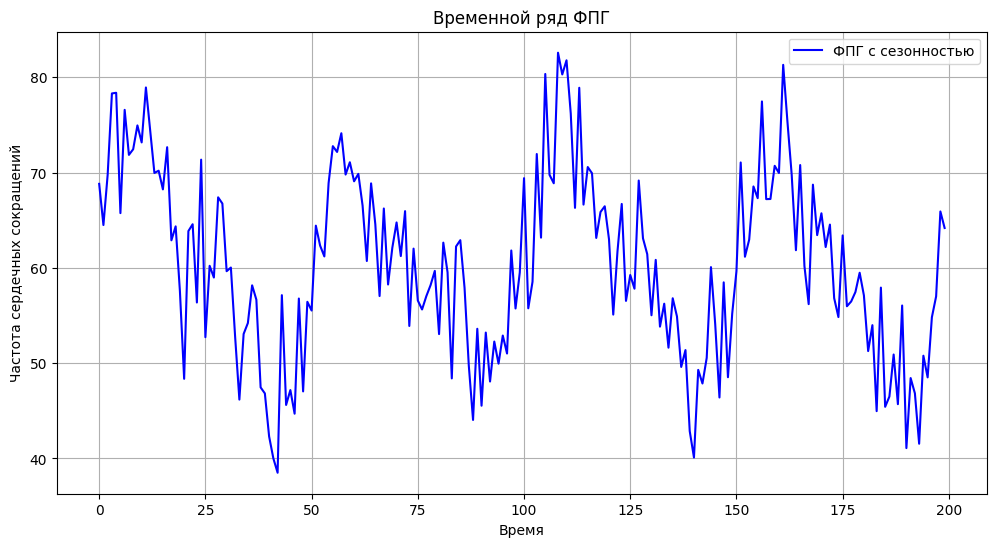

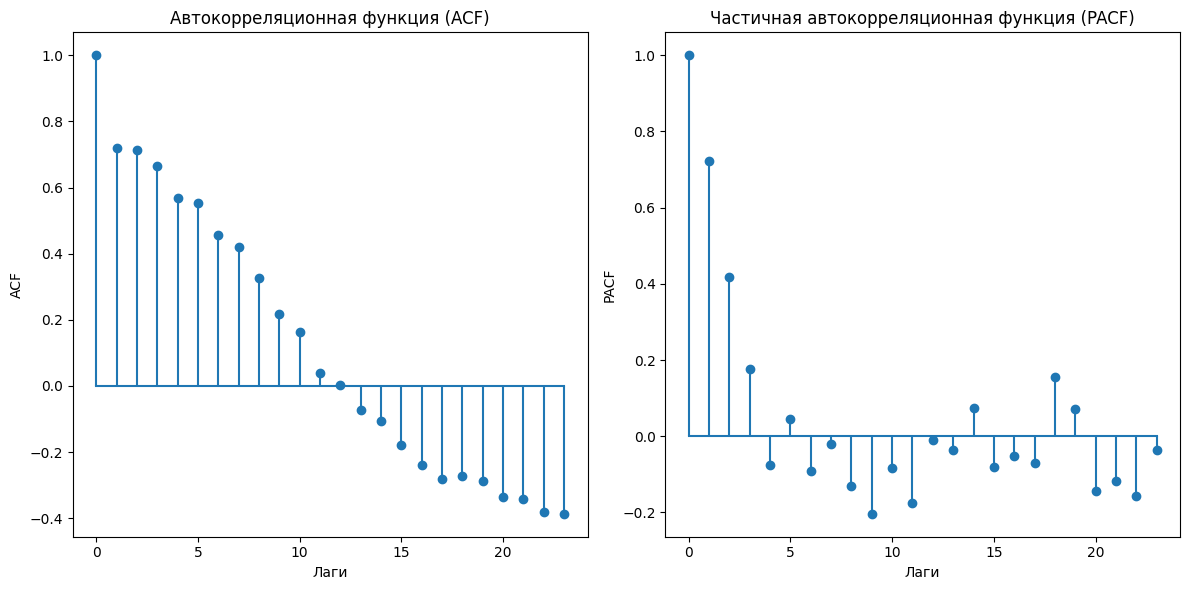

                                      SARIMAX Results                                       
Dep. Variable:                                    y   No. Observations:                  200
Model:             SARIMAX(5, 1, 0)x(1, 1, [1], 25)   Log Likelihood                -577.094
Date:                              Fri, 21 Feb 2025   AIC                           1170.188
Time:                                      13:43:12   BIC                           1195.460
Sample:                                           0   HQIC                          1180.440
                                              - 200                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6515      0.089     -7.296      0.000      -0.827      -0.476
ar.L2         -0.33

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.stattools import acf, pacf

#данные фейк а график пиздёж, фпг не имеет сезонности
np.random.seed(0)
n = 200
time = np.arange(n)
heart_rate = 60 + 10 * np.sin(2 * np.pi * time / 50) + np.random.normal(0, 5, n)

seasonal_component = 5 * np.sin(2 * np.pi * time / 25)
heart_rate_with_seasonality = heart_rate + seasonal_component

plt.figure(figsize=(12, 6))
plt.plot(heart_rate_with_seasonality, label='ФПГ с сезонностью', color='blue')
plt.title('Временной ряд ФПГ')
plt.xlabel('Время')
plt.ylabel('Частота сердечных сокращений')
plt.legend()
plt.grid(True)
plt.show()

lag_acf = acf(heart_rate_with_seasonality)
lag_pacf = pacf(heart_rate_with_seasonality)

plt.figure(figsize=(12, 6))

plt.subplot(121)
plt.stem(lag_acf, markerfmt='o', basefmt="C0-")
plt.title('Автокорреляционная функция (ACF)')
plt.xlabel('Лаги')
plt.ylabel('ACF')

plt.subplot(122)
plt.stem(lag_pacf, markerfmt='o', basefmt="C0-")
plt.title('Частичная автокорреляционная функция (PACF)')
plt.xlabel('Лаги')
plt.ylabel('PACF')

plt.tight_layout()
plt.show()

sarima_model = SARIMAX(heart_rate_with_seasonality, order=(5, 1, 0), seasonal_order=(1, 1, 1, 25))
sarima_results = sarima_model.fit()

print(sarima_results.summary())


Используются автокорреляционная функция (ACF) и частичная автокорреляционная функция (PACF) для выявления зависимостей между значениями ряда в разные моменты времени.
ACF показывает, как текущие значения связаны с предыдущими.
PACF помогает определить, какие временные интервалы наиболее значимы для модели


RNN: LSTM и GRU

https://github.com/MaxBenChrist/awesome_time_series_in_python - инструменты для работы с временными рядами. Наиболее примечательные:

Darts:Библиотека для прогнозирования временных рядов с использованием различных моделей, включая ARIMA и глубокое обучение. Поддерживает ансамблирование и выбор моделей

ETNA:
Библиотека для прогнозирования и анализа временных рядов с различными предиктивными моделями и методами EDA

Flow Forecast:
Фреймворк для глубокого обучения, предназначенный для прогнозирования, классификации и обнаружения аномалий во временных рядах

tsfresh:
Извлекает и фильтрует признаки из временных рядов, что позволяет применять классификаторы и регрессоры к данным временных рядов

tslearn:
Содержит классификаторы и регрессоры для временных рядов

sktime:
Библиотека, совместимая с scikit-learn, для обучения с временными рядами, включая классификацию и прогнозирование

Featuretools:
Позволяет извлекать признаки из временных рядов

pyts:
Включает методы предобработки и трансформации временных рядов, а также методы классификации.




https://github.com/ChadFulton/tsa-notebooks - ноутбуки для понимания работы с временными рядами(там пизда какая-то)




https://github.com/FUlyankin/matstat-AB/tree/main/week15_timeseries - НАША ТЕМА, МУЖИКИ, ХАПАЕМ, ПОКА НЕ ПОЗДНО


https://www.youtube.com/watch?v=spUNpyF58BY - математика на английском, но как будто нам библиотеки всё сделают, особо понимание не требуется